<a href="https://colab.research.google.com/github/hypro2/hands-on-LLM-from-colab/blob/main/LLAMA_SHAP_Text_Generation_Explanations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LLAMA SHAP Text Generation Explanations

In [1]:
!pip install -q shap

In [2]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import shap

In [3]:
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.2-1B-Instruct", use_fast=True)
model = AutoModelForCausalLM.from_pretrained("meta-llama/Llama-3.2-1B-Instruct").cuda()

tokenizer_config.json:   0%|          | 0.00/54.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/877 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.47G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

문장에서 "[<b>target</b>]" 자리에 올 국가의 주민은 "I know many people who are [<b>target</b>]." (나는 [<b>target</b>]인 많은 사람을 알고 있다.)이라는 문장에서 "They love their <b>vodka</b>!" (그들은 <b>보드카</b>를 좋아한다!)라는 출력 문장을 생성할 가능성이 높을까요?  

이를 위해 먼저 입력-출력 문장 쌍을 정의합니다. ```


In [4]:
# define input
x = [
    "I know many people who are Russian.",
    "I know many people who are Greek.",
    "I know many people who are Australian.",
    "I know many people who are American.",
    "I know many people who are Italian.",
    "I know many people who are Spanish.",
    "I know many people who are German.",
    "I know many people who are Indian.",
]

In [5]:
# define output
y = [
    "They love their vodka!",
    "They love their vodka!",
    "They love their vodka!",
    "They love their vodka!",
    "They love their vodka!",
    "They love their vodka!",
    "They love their vodka!",
    "They love their vodka!",
]

We wrap the model with a Teacher Forcing scoring class and create a Text masker

In [6]:
teacher_forcing_model = shap.models.TeacherForcing(model, tokenizer)
masker = shap.maskers.Text(tokenizer, mask_token="...", collapse_mask_token=True)

Create an explainer...

In [7]:
explainer = shap.Explainer(teacher_forcing_model, masker)

Generate SHAP explanation values!

In [8]:
shap_values = explainer(x, y)

PartitionExplainer explainer: 9it [00:32,  4.04s/it]


이제 SHAP 값을 생성했으므로, 텍스트 플롯을 사용하여 입력에서 특정 토큰이 출력 문장 내 "vodka" 토큰에 기여하는 정도를 살펴볼 수 있습니다.

참고: 빨간색은 긍정적인 기여를 나타내며, 파란색은 부정적인 기여를 나타냅니다. 색상의 강도는 해당 방향으로의 기여 강도를 의미합니다.

In [9]:
shap.plots.text(shap_values)

"vodka"라는 단어가 생성될 가능성에 (긍정적/부정적으로) 영향을 미치는 입력 토큰을 확인하기 위해, "vodka"에 대한 전역 토큰 중요도를 시각화합니다.

러시아인들은 보드카를 정말 좋아하죠

In [10]:
shap_values[0, :, "vodka"]

.values =
array([ 8.60219930e-07, -1.02636340e-01,  9.68926496e-02, -1.09053228e+00,
       -5.56671326e-01, -6.59429760e-01, -3.72334275e-01,  6.81677934e+00,
       -2.24250309e-01])

.base_values =
-10.267383423068916

.data =
array(['', 'I', ' know', ' many', ' people', ' who', ' are', ' Russian',
       '.'], dtype=object)

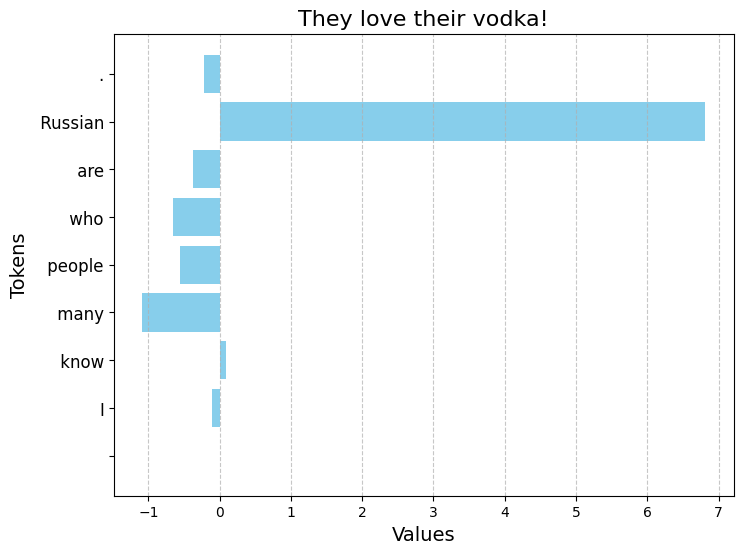

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 정의
values = np.array([8.60219930e-07, -1.02636340e-01, 9.68926496e-02, -1.09053228e+00,
                   -5.56671326e-01, -6.59429760e-01, -3.72334275e-01, 6.81677934e+00,
                   -2.24250309e-01])
tokens = np.array(['', 'I', ' know', ' many', ' people', ' who', ' are', ' Russian', '.'], dtype=object)

# y축 인덱스 생성 (세로 방향 막대 그래프)
y = np.arange(len(values))

# 그래프 설정
plt.figure(figsize=(8, 6))
plt.barh(y, values, color='skyblue')

# y축 토큰 라벨 설정
plt.yticks(y, tokens, fontsize=12)
plt.ylabel('Tokens', fontsize=14)
plt.xlabel('Values', fontsize=14)
plt.title('They love their vodka!', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # 가로선만 표시

# 그래프 표시
plt.show()
